In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense




train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'C:/Users/rajij/Downloads/dataset/train'
val_dir = 'C:/Users/rajij/Downloads/dataset/test'

train_generator = train_datagen.flow_from_directory(train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model on validation data
val_labels = validation_generator.classes
print(val_labels)
y_pred_probs = model.predict(validation_generator)  
y_pred = (y_pred_probs > 0.5).astype(int)  

# Calculate the evaluation metrics
accuracy = accuracy_score(val_labels, y_pred)
precision = precision_score(val_labels, y_pred)
recall = recall_score(val_labels, y_pred)
f1 = f1_score(val_labels, y_pred)
conf_matrix = confusion_matrix(val_labels, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.legend(loc='upper left')
plt.show()

Found 3069 images belonging to 2 classes.
Found 764 images belonging to 2 classes.
Epoch 1/10
25/95 [======>.......................] - ETA: 1:22 - loss: 0.7083 - accuracy: 0.6538

c:\Users\rajij\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


95/95 [==============================] - 122s 1s/step - loss: 0.4404 - accuracy: 0.8143 - val_loss: 0.1592 - val_accuracy: 0.9511
Epoch 2/10
95/95 [==============================] - 105s 1s/step - loss: 0.2161 - accuracy: 0.9210 - val_loss: 0.1439 - val_accuracy: 0.9552
Epoch 3/10
95/95 [==============================] - 100s 1s/step - loss: 0.1837 - accuracy: 0.9299 - val_loss: 0.1474 - val_accuracy: 0.9524
Epoch 4/10
95/95 [==============================] - 101s 1s/step - loss: 0.1747 - accuracy: 0.9272 - val_loss: 0.1860 - val_accuracy: 0.9429
Epoch 5/10
95/95 [==============================] - 105s 1s/step - loss: 0.1518 - accuracy: 0.9450 - val_loss: 0.1053 - val_accuracy: 0.9606
Epoch 6/10
95/95 [==============================] - 98s 1s/step - loss: 0.1286 - accuracy: 0.9529 - val_loss: 0.0856 - val_accuracy: 0.9688
Epoch 7/10
95/95 [==============================] - 98s 1s/step - loss: 0.1204 - accuracy: 0.9542 - val_loss: 0.1159 - val_accuracy: 0.9606
Epoch 8/10
95/95 [========

NameError: name 'accuracy_score' is not defined

Accuracy: 0.5013089005235603
Precision: 0.5012285012285013
Recall: 0.5340314136125655
F1-score: 0.5171102661596958
Confusion Matrix:
[[179 203]
 [178 204]]


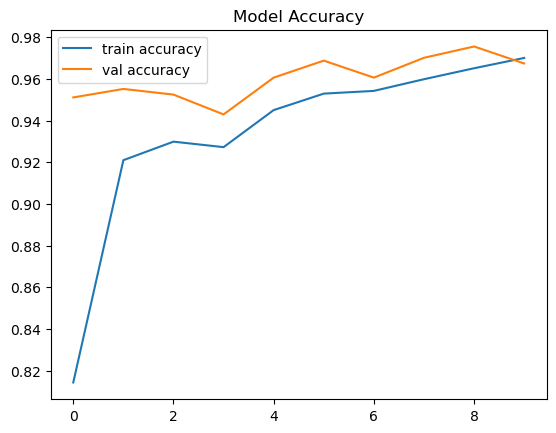

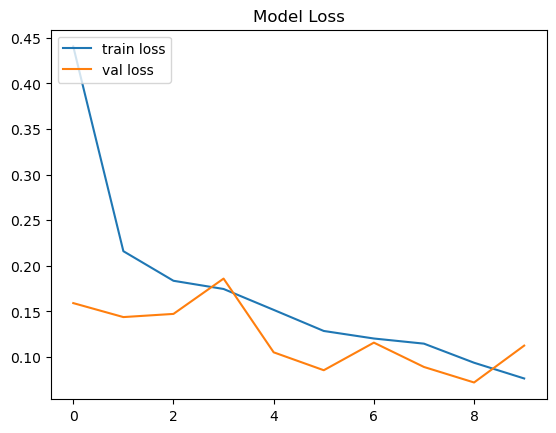

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Calculate the evaluation metrics
accuracy = accuracy_score(val_labels, y_pred)
precision = precision_score(val_labels, y_pred)
recall = recall_score(val_labels, y_pred)
f1 = f1_score(val_labels, y_pred)
conf_matrix = confusion_matrix(val_labels, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(train_generator.class_indices)

{'with_mask': 0, 'without_mask': 1}


In [ ]:
import cv2
import numpy as np



In [ ]:
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array # Import load_img and img_to_array from tensorflow.keras.utils


#to make prediction

img_path = 'C:/Users/rajij/Downloads/testmodel3_no.jpg'
img = load_img(img_path, target_size=(150, 150)) # Use load_img from tensorflow.keras.utils
img_array = img_to_array(img) # Use img_to_array from tensorflow.keras.utils
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize image

prediction = model.predict(img_array)
if prediction > 0.5:
    print("No, the person is not wearing a mask.")
else:
    print("Yes, the person is wearing a mask.")

1/1 [==============================] - 0s 41ms/step
No, the person is not wearing a mask.
1/1 [==============================] - 0s 41ms/step
No, the person is not wearing a mask.


In [ ]:
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array # Import load_img and img_to_array from tensorflow.keras.utils


#to make prediction

img_path = 'C:/Users/rajij/Downloads/testmodel2.jpg'
img = load_img(img_path, target_size=(150, 150)) # Use load_img from tensorflow.keras.utils
img_array = img_to_array(img) # Use img_to_array from tensorflow.keras.utils
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize image

prediction = model.predict(img_array)
if prediction > 0.5:
    print("No, the person is not wearing a mask.")
else:
    print("Yes, the person is wearing a mask.")

1/1 [==============================] - 0s 37ms/step
Yes, the person is wearing a mask.
1/1 [==============================] - 0s 37ms/step
Yes, the person is wearing a mask.


In [ ]:
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array # Import load_img and img_to_array from tensorflow.keras.utils


#to make prediction

img_path = 'C:/Users/rajij/Downloads/testmodel7.jpg'
img = load_img(img_path, target_size=(150, 150)) # Use load_img from tensorflow.keras.utils
img_array = img_to_array(img) # Use img_to_array from tensorflow.keras.utils
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize image

prediction = model.predict(img_array)
if prediction > 0.5:
    print("No, the person is not wearing a mask.")
else:
    print("Yes, the person is wearing a mask.")

1/1 [==============================] - 0s 36ms/step
Yes, the person is wearing a mask.
1/1 [==============================] - 0s 36ms/step
Yes, the person is wearing a mask.


In [ ]:
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array # Import load_img and img_to_array from tensorflow.keras.utils


#to make prediction

img_path = 'C:/Users/rajij/Downloads/testmodel6_no.jpg'
img = load_img(img_path, target_size=(150, 150)) # Use load_img from tensorflow.keras.utils
img_array = img_to_array(img) # Use img_to_array from tensorflow.keras.utils
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize image

prediction = model.predict(img_array)
if prediction > 0.5:
    print("No, the person is not wearing a mask.")
else:
    print("Yes, the person is wearing a mask.")

1/1 [==============================] - 0s 67ms/step
No, the person is not wearing a mask.
1/1 [==============================] - 0s 67ms/step
No, the person is not wearing a mask.
